In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import u

plt.rcParams["figure.figsize"] = (15, 5)

# Data Generation

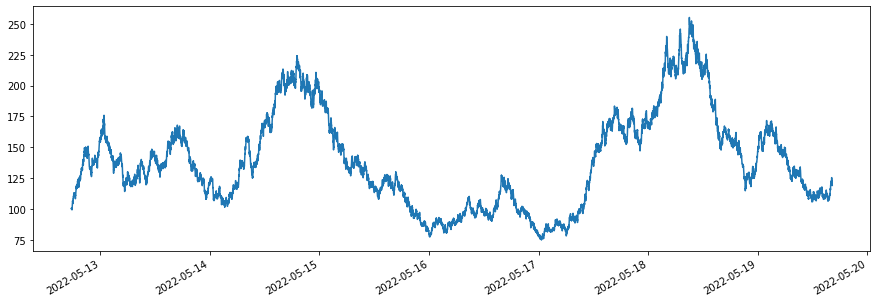

<AxesSubplot:>

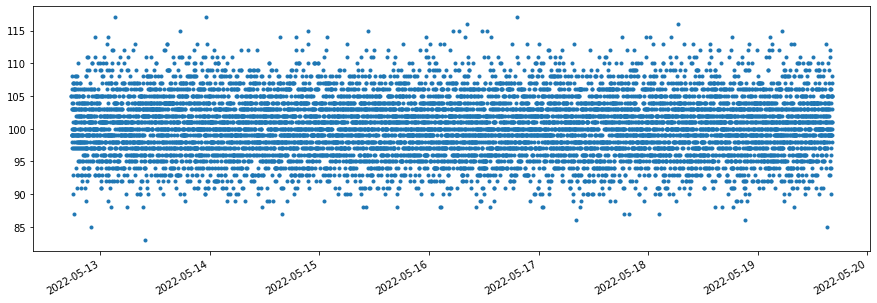

In [3]:
data = u.create_price_data(theta=0.0005, start_price=100, n_samples=10000)
data = u.add_volume_data(data, var=20)

data["close"].plot.line()
plt.show()
data["volume"].plot(style='.')

In [4]:
def create_bar_indices(data: pd.DataFrame, thres: float, name: str):
    indices = np.full(len(data.index), False, dtype=bool)
    csum = 0.
    for e, (_, r) in enumerate(data.iterrows()):
        if csum >= thres:
            csum = 0.
            indices[e] = True
        csum += r[name]
    return indices

def group_bars(data, indices):
    groups = data.reset_index().groupby(indices.cumsum())
    bars = groups[["volume"]].sum()
    return groups, bars

def get_bars(group):
    groups, bars = group
    bars.set_index(groups["index"].first(), inplace=True)
    return bars 

def with_dv(group):
    groups, bars = group
    bars["dv"] = groups["dv"].sum()
    return groups, bars

def with_open(group):
    groups, bars = group
    bars["open"] = groups["close"].first()
    return groups, bars
    
def with_low(group):
    groups, bars = group
    bars["low"] = groups["close"].min()
    return groups, bars 
    
def with_high(group):
    groups, bars = group
    bars["high"] = groups["close"].max()
    return groups, bars 
    
def with_close(group):
    groups, bars = group
    bars["close"] = groups["close"].last()
    return groups, bars

# Tick Bars

In [ ]:
data["tmp"] = 1
tick_indices = create_bar_indices(data, 60, "tmp")
g = group_bars(data, tick_indices)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
tick_bars = get_bars(g)
tick_bars.head()

In [ ]:
mplf.plot(tick_bars, type="candle", style="charles", figsize=(15,5), volume=True)

# Dollar Bars

In [5]:
data["dv"] = data["close"] * data["volume"]

In [6]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
mean_hourly_dv

829206.7332142858

In [7]:
dv_indices = create_bar_indices(data, mean_hourly_dv, "dv")
g = group_bars(data, dv_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
dv_bars = get_bars(g)
dv_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-05-12 17:40:11.020205,7581.0,831840.16,100.00,118.70,119.86,99.23
2022-05-12 18:55:11.020205,6654.0,831497.72,118.64,132.73,133.06,116.76
2022-05-12 20:01:11.020205,5883.0,837373.32,130.93,144.68,150.17,130.93
2022-05-12 21:00:11.020205,6028.0,841532.40,143.45,127.78,150.81,127.78
2022-05-12 22:00:11.020205,6151.0,840316.33,127.90,138.28,143.49,126.19


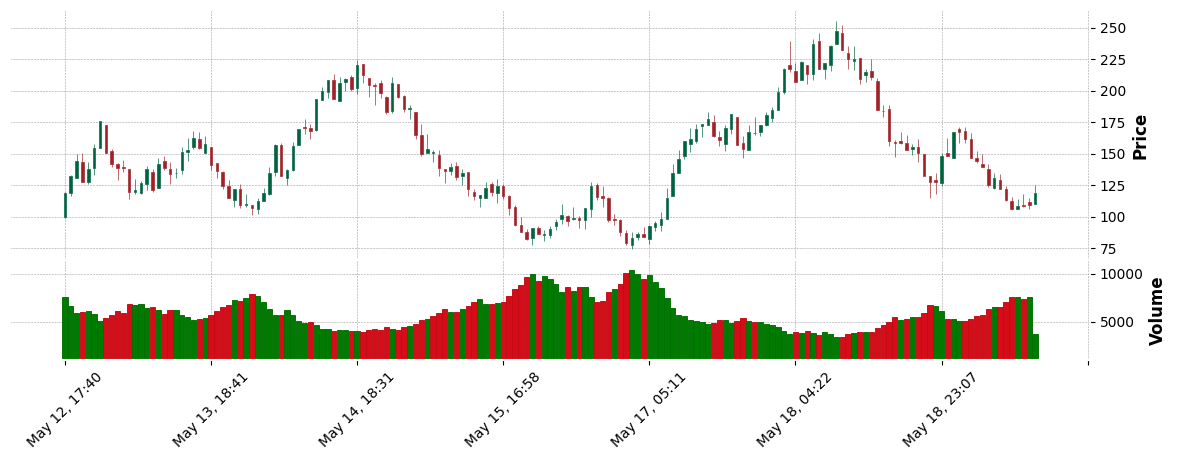

In [8]:
mplf.plot(dv_bars, type="candle", style="charles", figsize=(15,5), volume=True)

# Volume Bars

In [9]:
mean_hourly_volume = np.mean(data.resample("H")["volume"].sum())
mean_hourly_volume

5979.309523809524

In [10]:
volume_indices = create_bar_indices(data, mean_hourly_volume, "volume")
g = group_bars(data, volume_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
v_bars = get_bars(g)
v_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-05-12 17:40:11.020205,5981.0,644646.94,100.00,112.49,113.07,99.23
2022-05-12 18:39:11.020205,6042.0,731409.27,113.40,125.12,126.97,113.40
2022-05-12 19:39:11.020205,6003.0,818433.14,123.80,146.50,149.56,123.80
2022-05-12 20:39:11.020205,6004.0,868738.49,146.92,134.03,150.81,134.03
2022-05-12 21:39:11.020205,6050.0,809599.79,133.58,139.14,141.10,126.19


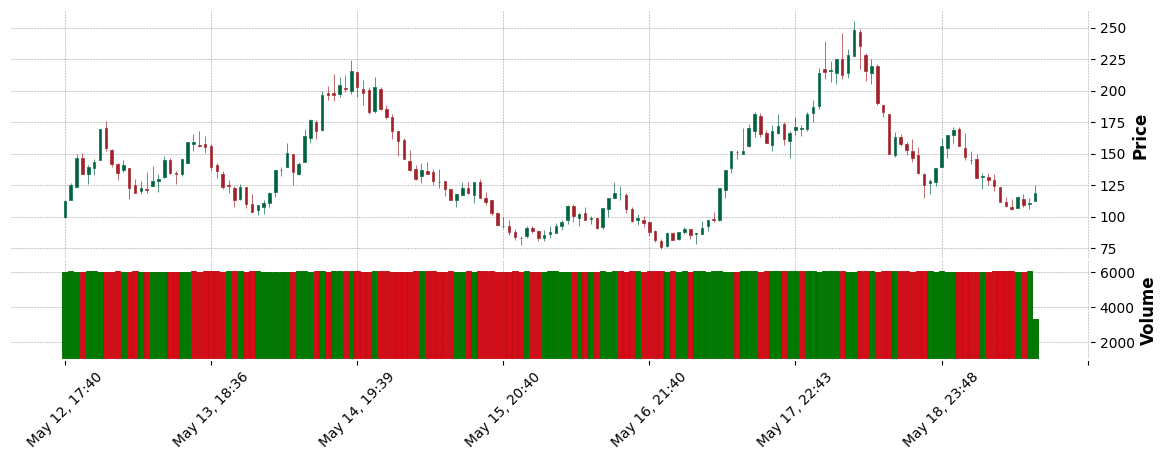

In [11]:
mplf.plot(v_bars, type="candle", style="charles", figsize=(15,5), volume=True)